# Import Libs

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('all_data.csv')

df.columns

Index(['acc_mean_x_right', 'acc_mean_y_right', 'acc_mean_z_right',
       'acc_mean_xyz_right', 'acc_mean_xy_right', 'acc_mean_yz_right',
       'acc_mean_zx_right', 'acc_mean_pitch_right', 'acc_mean_roll_right',
       'acc_std_x_right',
       ...
       'gyro_max_yz_left', 'gyro_max_zx_left', 'gyro_peak_x_left',
       'gyro_peak_y_left', 'gyro_peak_z_left', 'gyro_peak_xyz_left',
       'gyro_peak_xy_left', 'gyro_peak_yz_left', 'gyro_peak_zx_left', 'class'],
      dtype='object', length=157)

# 2 - Classification Report

## 2.1 - SVC Model

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.49      0.61       456
           1       0.00      0.00      0.00        98
           2       0.90      0.98      0.94      2935

    accuracy                           0.89      3489
   macro avg       0.57      0.49      0.52      3489
weighted avg       0.86      0.89      0.87      3489



D:\Swinburne\COS40007 - Artificial Intelligence for Engineering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Swinburne\COS40007 - Artificial Intelligence for Engineering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Swinburne\COS40007 - Artificial Intelligence for Engineering\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

## 2.2 - RandomForest Model

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.74       456
           1       0.73      0.22      0.34        98
           2       0.93      0.98      0.95      2935

    accuracy                           0.92      3489
   macro avg       0.84      0.62      0.68      3489
weighted avg       0.91      0.92      0.91      3489



## 2.3 - SGD Model

In [5]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.54      0.63       456
           1       0.54      0.13      0.21        98
           2       0.91      0.97      0.94      2935

    accuracy                           0.89      3489
   macro avg       0.73      0.55      0.59      3489
weighted avg       0.88      0.89      0.88      3489



## 2.4 - MLP Model

In [6]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.53      0.64       456
           1       0.30      0.14      0.19        98
           2       0.91      0.97      0.94      2935

    accuracy                           0.89      3489
   macro avg       0.67      0.55      0.59      3489
weighted avg       0.88      0.89      0.88      3489



## 2.5 Summary

1) Which model has the best F1 score in terms of weighted average. Is this different from the accuracy that you obtained in Studio 3?
2) Which model has the best precision value
3) Which model has the best recall value
4) Which model has the best accuracy value
5) Which class has poor performance across all models?

# 3 - Confusion Matrix

## 3.1 - SGD

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

cm_sgd = confusion_matrix(y_test, y_pred)

cm_sgd


array([[ 180,    5,  271],
       [   3,    0,   95],
       [  63,    0, 2872]])

In [8]:
## 3.2 - Random Forest

In [9]:
from sklearn.metrics import confusion_matrix

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred)

cm_rf

array([[ 293,    1,  162],
       [   2,   25,   71],
       [  39,    6, 2890]])

## 3.3 - SVC

In [10]:
from sklearn.metrics import confusion_matrix

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred)

cm_svm

array([[ 223,    0,  233],
       [   2,    0,   96],
       [  51,    0, 2884]])

## 3.4 - MLP

In [11]:
from sklearn.metrics import confusion_matrix

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

cm_mlp = confusion_matrix(y_test, y_pred)

cm_mlp

array([[ 290,   29,  137],
       [   9,   47,   42],
       [ 216,  168, 2551]])

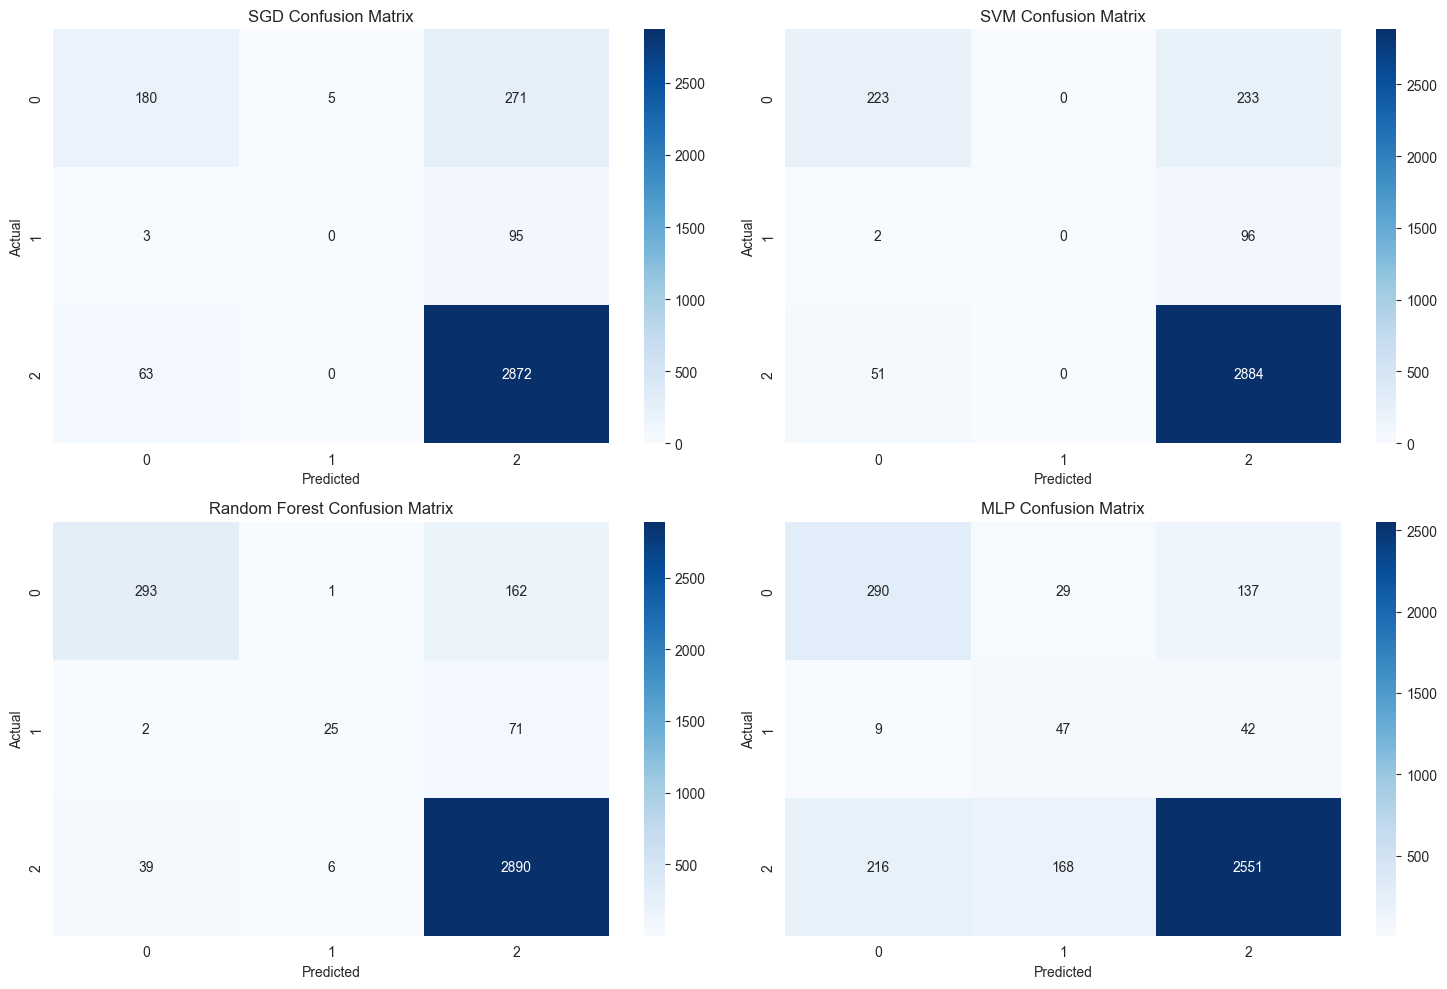

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('SGD Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('SVM Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Random Forest Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('MLP Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 4 - Class balancing

In [13]:
# Check distribution of classes
df['class'].value_counts()

class
2    9693
0    1593
1     343
Name: count, dtype: int64

In [15]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Assuming X_train and y_train are your features and target variables
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check class distribution after SMOTE + undersampling
print(Counter(y_resampled))

Counter({1: 6757, 0: 6746, 2: 6745})


In [16]:
y_resampled.value_counts()

class
1    6757
0    6746
2    6745
Name: count, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Train a random forest classier on the resampled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74       456
           1       0.75      0.24      0.37        98
           2       0.93      0.98      0.95      2935

    accuracy                           0.92      3489
   macro avg       0.85      0.63      0.69      3489
weighted avg       0.91      0.92      0.91      3489



In [18]:
# Visualize the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

cm_rf

array([[ 295,    2,  159],
       [   1,   24,   73],
       [  42,    6, 2887]])

## Adding class weights

In [20]:
class_weights = {
    0 : 0.3,
    1 : 0.5,
    2 : 0.2
}

# Train the model again with class weights

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75       456
           1       0.80      0.24      0.38        98
           2       0.93      0.99      0.95      2935

    accuracy                           0.92      3489
   macro avg       0.87      0.63      0.69      3489
weighted avg       0.92      0.92      0.91      3489



In [21]:
confusion_matrix(y_test, y_pred)

array([[ 295,    1,  160],
       [   1,   24,   73],
       [  39,    5, 2891]])